In [69]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузим датасет

In [116]:
df = pd.read_csv('dataset.csv', header=0, infer_datetime_format=True,
                   parse_dates=['course_finished_date'], index_col=['course_finished_date'])

/var/folders/4d/01h37whs1gsddkj2yj7jszjh0000gn/T/ipykernel_42652/2255855955.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('dataset.csv', header=0, infer_datetime_format=True,


In [110]:
y = df['course_duration_sum']
X = df.drop(['course_duration_sum', 'ldap_unique_count', 
             'learning_unique_count', 'course_id_unique_count', 'program_id_unique_count', 
             'ct_Article', 'ct_Exercise', 'ct_File', 'ct_Interview', 'ct_Scorm', 'ct_Assessment', 'ct_Video', 
             'is_DebOcc', 'is_academy', 'is_sage1_3', 'is_sage4_6', 'is_sage7_12', 'is_prof', 'is_mo', 'is_plan', 
             'is_services', 'is_leadership'], axis=1)

In [117]:
y = df['course_duration_sum']
X = df.drop(['course_duration_sum'], axis=1)

In [118]:
X.head()

,Unnamed: 0,ldap_unique_count,learning_unique_count,course_id_unique_count,program_id_unique_count,ct_Article,ct_Exercise,ct_File,ct_Interview,ct_Scorm,...,weekday,weekend,lag_day_8,lag_day_9,lag_day_10,lag_day_11,lag_day_12,lag_day_13,lag_day_14,2_weeks_mean
course_finished_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,0,54,149,115,68,0,0,0,0,137,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-01-02,1,580,1580,444,153,0,0,5,0,1346,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-01-03,2,699,1896,542,165,0,0,6,0,1634,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-01-04,3,681,1748,425,161,0,0,3,0,1475,...,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-01-05,4,641,1618,502,165,0,0,1,0,1391,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [125]:
X_train = X[14:-37]
X_valid = X[-37:-30]
y_train = y[14:-37]
y_valid = y[-37:-30]


In [132]:
parameters = {    
    'n_estimators': [221, 222, 223],
    'min_samples_leaf': np.arange(1, 8),
    'max_depth': np.arange(1, 16)
}

parameters = {    
    'n_estimators': [217, 218, 219],
    'min_samples_leaf': [1],
    'max_depth':  [13]
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=10,  
    n_jobs = -1
)

In [133]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [13], 'min_samples_leaf': [1],
                         'n_estimators': [217, 218, 219]},
             scoring='neg_mean_squared_error')

In [134]:
clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 1, 'n_estimators': 219}

In [135]:
rf_model = RandomForestRegressor(max_depth=13, # глубина дерева  
                                 min_samples_leaf=1, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=219  # кол-во деревьев
                                 )
rf_model.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_valid)

In [136]:
result_df = pd.DataFrame()
result_df["test"] = y_valid
result_df["pred"] = test_pred
result_df.index = y_valid.index

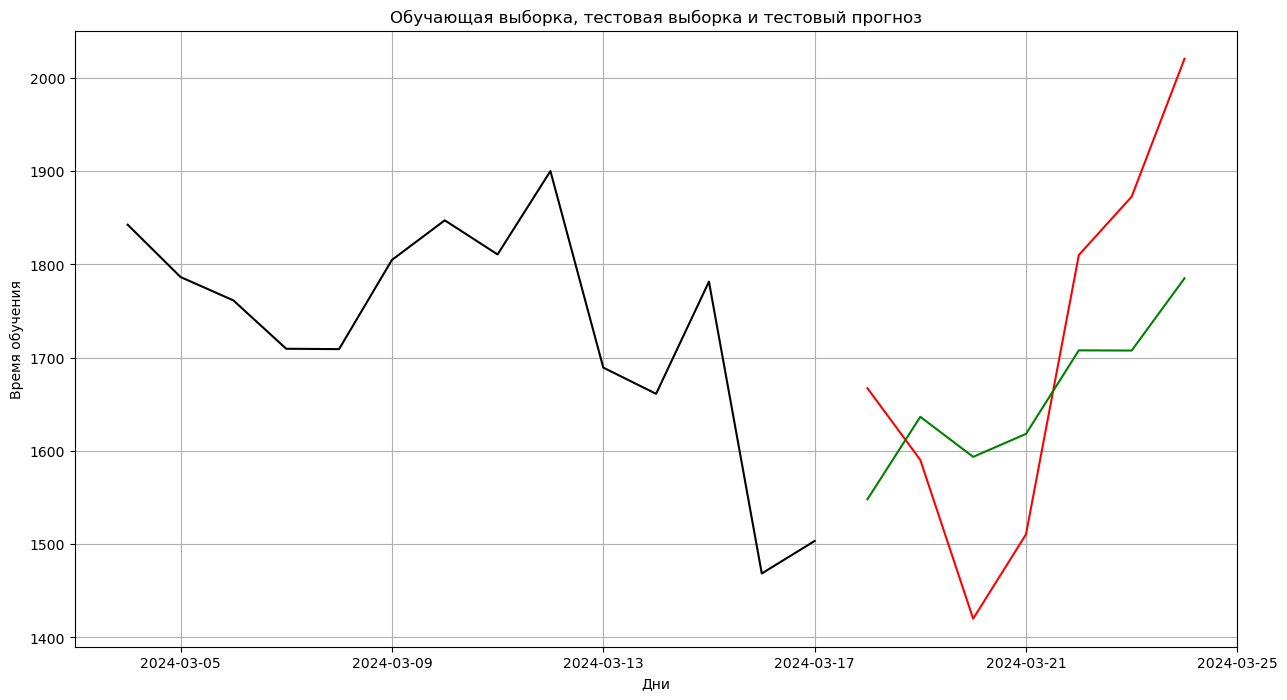

In [139]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.figure(figsize=(15,8))
plt.plot(y_train[-14:], color = "black")
plt.plot(result_df["test"], color = "red")
plt.plot(result_df["pred"], color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Время обучения')
plt.xlabel('Дни')
 
# добавим сетку
plt.grid()
 
plt.show()

In [138]:
mse = mean_squared_error(result_df["test"], result_df["pred"])
print('RMSE:', mse**0.5)

RMSE: 146.99201197356095
